![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [78]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [80]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 3


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 4


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 5


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [82]:
# Celda 6
# NOTA: El punto 6 se ha distribuido en varias celdas para facilitar la ejecución y visualización de resultados:

# 1) Instalación de XGBoost e importación de librerías
# 2) Creación, entrenamiento y evaluación del modelo XGBoost para regresión
# 3) Peso por cada características (feature: año, millaje y modelo) en la predicción
# 4) Análisis de resultados

# Instalación de XGBoost
# Se llevó a cabo la instalación de XGBoost la primera vez.
# !pip install xgboost

# Importación de librerías necesarias
# La diferencia con el laboratorio 2 de la semana 2 es que en el laboratorio 2 se busca predecir el abandono de clientes (Churn),
# la cual es una variable categórica, mientras que aquí estamos hablando de predecir el precio de automóviles, es decir, de una 
# variable continua, y por tanto no es un problema de clasificación, sino de regresión.
# Por ello, se ha utilizado XGBRegressor. De igual manera,en lugar de utilizar las métricas de evaluación son F1-Score y Accuracy,
# que son apropiadas para clasificación, aquí se van a utilizar RMSE (Root Mean Squared Error) y MAE (Mean Absolute Error).

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [84]:
# Creación del modelo XGBoost para regresión con parámetros por defecto
# Se utiliza "objective='reg:squarederror'" para hacer la regresión usando el error cuadrático como función objetivo

xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenamiento del modelo
xgb_reg.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = xgb_reg.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Métricas de rendimiento del modelo XGBoost:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")

Métricas de rendimiento del modelo XGBoost:
RMSE: $1605.24
MAE: $1185.23


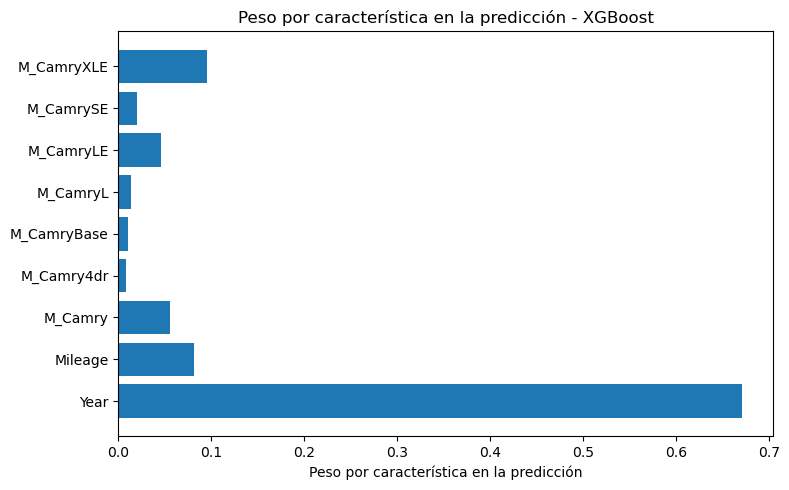

In [86]:
# Visualización básica de la importancia de características
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(X.columns, xgb_reg.feature_importances_)
plt.xlabel('Peso por característica en la predicción')
plt.title('Peso por característica en la predicción - XGBoost')
plt.tight_layout()
plt.show()

**Análisis resultados**

Las métricas de rendimiento del modelo XGBoost fueron:  
RMSE: \\$1605.24
MAE: \\$1185.23  

Respecto a la gráfica de "Peso por característica (feature) en la predicción, el mayor peso lo obtuvo el año del automóvil (alrededor del 67%), seguido del modelo Camry XLE (alrededor del 10%) y del millaje (alrededor del 9%).

### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros encontrados:
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05}

Métricas del modelo XGBoost calibrado:
RMSE: $1544.31
MAE: $1134.97

Mejora respecto al modelo base:
RMSE: $60.93 de mejora
MAE: $50.26 de mejora


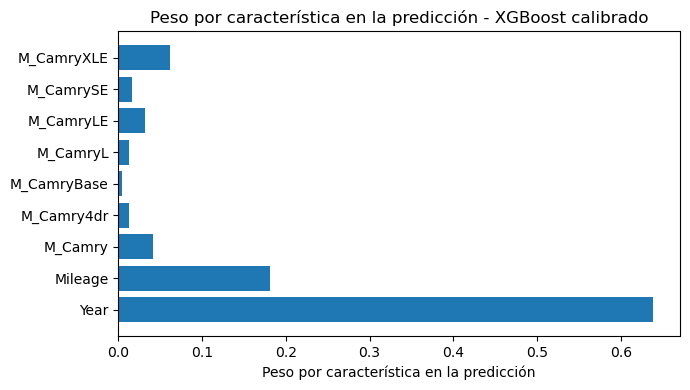

In [116]:
# Celda 7

# NOTA: El punto 7 se ha distribuido en varias celdas para facilitar la ejecución y visualización de resultados:

# 1) Importación de la librería GridSearchCV, definión del grid, entrenamiento del modelo y visualización de resultados.
# 2) Análisis resultados XGBoost con calibración de parámetros con el comparativo VS el punto 6
# 3) Análisis del comportamiento de RMSE y MAE para diferentes precios reales VS predichos
# 4) Análisis de la gráfica

# Punto 7 - Calibración de parámetros XGBoost

from sklearn.model_selection import GridSearchCV

# Se define el modelo base
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Se define el grid de parámetros a probar
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'gamma': [0, 0.1, 0.5, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Configuramos la búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Se ejecuta la búsqueda de parámetros
grid_search.fit(X_train, y_train)

# Se muestran los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Se evalua el rendimiento del mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas de rendimiento
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMétricas del modelo XGBoost calibrado:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")

# Comparación con el modelo base
print(f"\nMejora respecto al modelo base:")
print(f"RMSE: ${1605.24 - rmse:.2f} de mejora")
print(f"MAE: ${1185.23 - mae:.2f} de mejora")

# Visualizamos la importancia de características del modelo calibrado
plt.figure(figsize=(7, 4))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel('Peso por característica en la predicción')
plt.title('Peso por característica en la predicción - XGBoost calibrado')
plt.tight_layout()
plt.show()

**Análisis resultados XGBoost con calibración de parámetros**

Después de calibrar parámetros los resultados fueron:

Fitting 5 folds for each of 48 candidates, totalling 240 fits. Validación cruzada de 5 pliegues, donde las combinaciones de parámetros que se tuvieron en cuenta fueron:  

    'learning_rate': [0.01, 0.05, 0.1, 0.3], (4 opciones)  
    'gamma': [0, 0.1, 0.5, 1.0], (4 opciones)  
    'colsample_bytree': [0.5, 0.7, 1.0], (3 opciones)  
    Total combinaciones: 4 x 4 x 3 = 48 por 5 iteraciones por la validación cruzada.

Mejores parámetros encontrados:
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05}

learning_rate (0.05): Parámetro que controla cuánto contribuye cada árbol al modelo final. El valor óptimo encontrado (0.05) es menor que el valor predeterminado (0.3). Esto indica que un enfoque más conservador funciona mejor para este problema. Un learning_rate más bajo reduce el riesgo de sobreajuste al permitir que el modelo aprenda más gradualmente, a costa de requerir más árboles para alcanzar un rendimiento similar.  

gamma (0): Este parámetro controla la poda mínima requerida para hacer una partición adicional en un nodo de árbol. El valor óptimo de 0 indica que no se necesita una ganancia mínima para crear nuevas divisiones. Nota: se hicieron pruebas con diferentes "escalas" de valores de gamma (por ejemplo, [50, 100, 200 y 500] y luego con [1000, 5000, 10000, 50000]) y no hubo ningún cambio, lo que puede sugerir que para este problema específico, la regularización a través de gamma no es tan crítica como otros parámetros.

colsample_bytree (0.7): Este parámetro determina la fracción de características que se consideran para cada árbol. El valor óptimo de 0.7 significa que cada árbol utiliza aleatoriamente el 70% de las características disponibles. Este valor menor que 1 introduce diversidad entre los árboles, mejorando la generalización del modelo.

Métricas del modelo XGBoost calibrado:
RMSE: \\$1544.31  
MAE: \\$1134.97  

Mejora respecto al modelo base:  
RMSE: \\$60.93 de mejora  
MAE: \\$50.26 de mejora  

Respecto a la gráfica de "Peso por característica (feature) en la predicción, hubo un cambio en la distribución de los pesos, respecto al modelo sin  calibración de parámetros. En este caso, el mayor peso lo maantuvo el año del automóvil (bajó del 67% al 65%), seguido ahora del millaje (pasó del 9% al 18%) y luego el modelo Camry XLE (bajó del 10% a alrededor del 6%).

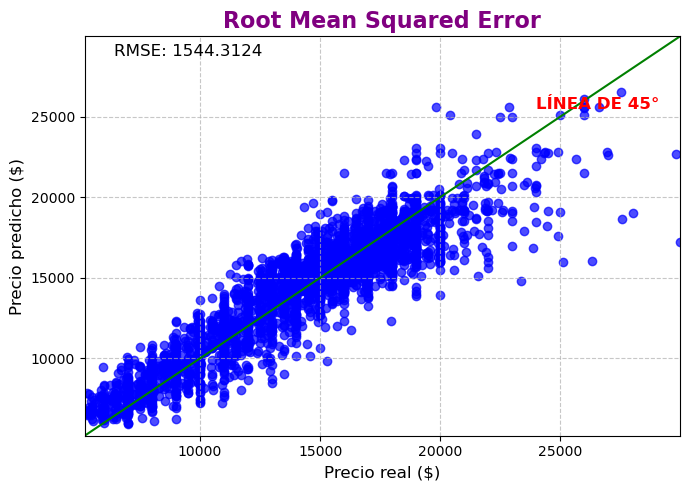

In [119]:
# Se hace un análisis como el efectuado por el profesor en la sesión sincrónica
# Análisis del comportamiento de RMSE y MAE para diferentes precios reales VS predichos

import seaborn as sns

# Los valor de los modelos son:
# y_test: Los valores reales
# y_pred: Las predicciones de tu modelo

# Crear la figura
plt.figure(figsize=(7, 5))

# Graficar los puntos (precio real vs. precio predicho)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)

# Se añade la línea de 45 grados (predicción perfecta)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'g-', label='Línea 45°')

# Etiquetas y título
plt.xlabel('Precio real ($)', fontsize=12)
plt.ylabel('Precio predicho ($)', fontsize=12)
plt.title('Root Mean Squared Error', fontsize=16, color='purple', fontweight='bold')

# Texto para la línea de 45°
plt.annotate('LÍNEA DE 45°', xy=(max_value*0.8, max_value*0.85), 
             color='red', fontweight='bold', fontsize=12)

# Se ajustan los límites del gráfico para que sean iguales en ambos ejes
plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)

# Se muestra la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Se añade la información del RMSE calculado previamente
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
plt.text(min_value + (max_value-min_value)*0.05, 
         max_value - (max_value-min_value)*0.05, 
         f'RMSE: {rmse:.4f}', 
         fontsize=12)

# Se ajustan los márgenes
plt.tight_layout()

# Se muestra el gráfico
plt.savefig('precio_real_vs_predicho.png', dpi=300)
plt.show()

**Análisis resultados**

La gráfica confirma que para los rangos de precios de 6 mil a 20 mil el modelo XGBoost calibrado tiene un desempeño muy razonable, con una dispersión mayor para los precios por encima de 20 mil.

### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

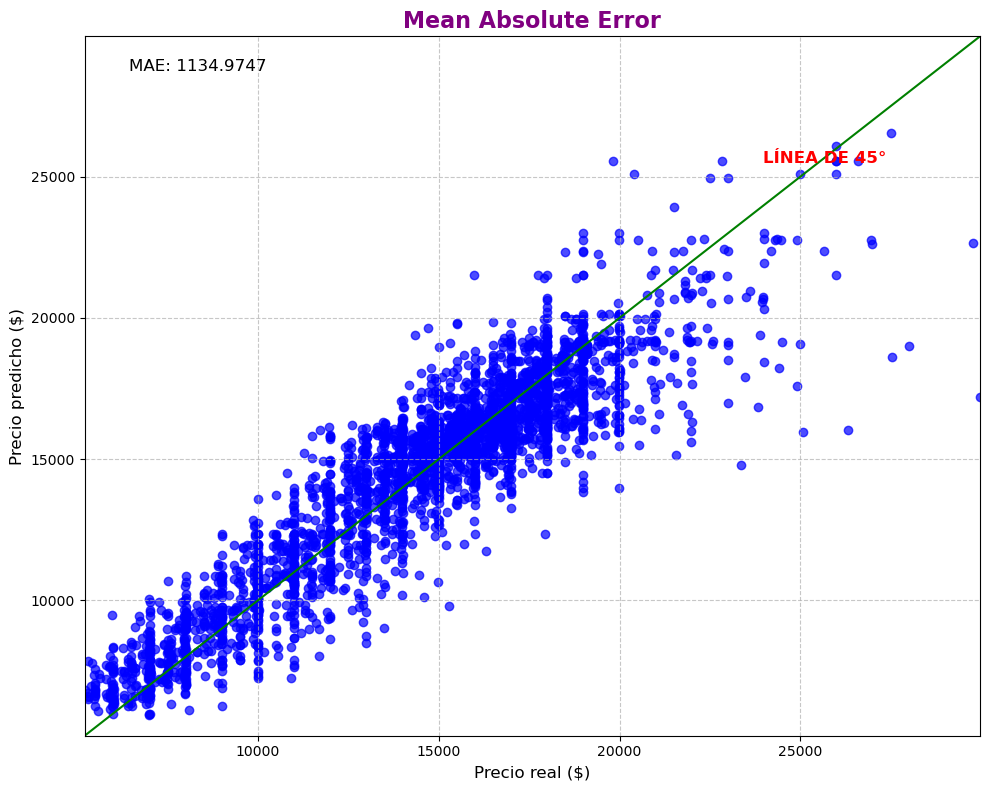

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Asumiendo que tienes los siguientes datos después de ejecutar tus modelos:
# y_test: Los valores reales
# y_pred: Las predicciones de tu modelo

# Crear la figura
plt.figure(figsize=(10, 8))

# Graficar los puntos (precio real vs. precio predicho)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)

# Añadir la línea de 45 grados (predicción perfecta)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'g-')

# Añadir etiquetas y título
plt.xlabel('Precio real ($)', fontsize=12)
plt.ylabel('Precio predicho ($)', fontsize=12)
plt.title('Mean Absolute Error', fontsize=16, color='purple', fontweight='bold')

# Añadir texto para la línea de 45°
plt.annotate('LÍNEA DE 45°', xy=(max_value*0.8, max_value*0.85), 
             color='red', fontweight='bold', fontsize=12)

# Ajustar los límites del gráfico para que sean iguales en ambos ejes
plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Calcular y añadir el MAE
mae = mean_absolute_error(y_test, y_pred)
plt.text(min_value + (max_value-min_value)*0.05, 
         max_value - (max_value-min_value)*0.05, 
         f'MAE: {mae:.4f}', 
         fontsize=12)

# Ajustar los márgenes
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('precio_real_vs_predicho_mae.png', dpi=300)
plt.show()

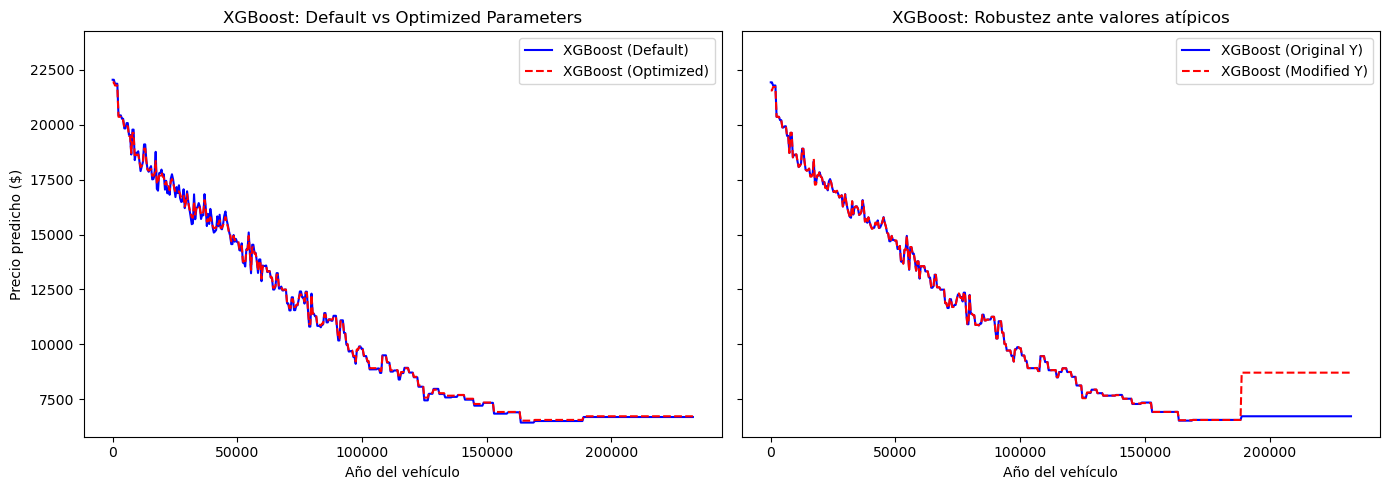

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Usamos los datos de tu taller
# Seleccionamos el año como característica principal para visualización
# X_feature = X_train['Year'].values.reshape(-1, 1)
X_feature = X_train['Mileage'].values.reshape(-1, 1)
y = y_train.values

# Introducir algunos valores extremos para demostrar robustez (opcional)
y_modified = y.copy()
y_modified[np.argmax(X_feature)] = y.max() * 2  # Duplicamos el valor máximo
y_modified[np.argmin(X_feature)] = y.min() * 0.5  # Reducimos el valor mínimo

# Entrenamos modelos XGBoost con diferentes configuraciones
# Modelo con parámetros por defecto
xgb_default = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_default.fit(X_feature, y)

# Modelo con los mejores parámetros encontrados
xgb_optimized = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    gamma=0,
    colsample_bytree=0.7,
    random_state=42
)
xgb_optimized.fit(X_feature, y)

# Modelo con datos modificados (para mostrar robustez)
xgb_modified = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    gamma=0,
    colsample_bytree=0.7,
    random_state=42
)
xgb_modified.fit(X_feature, y_modified)

# Generar predicciones
X_test = np.linspace(X_feature.min(), X_feature.max(), 500).reshape(-1, 1)
y_pred_default = xgb_default.predict(X_test)
y_pred_optimized = xgb_optimized.predict(X_test)
y_pred_modified = xgb_modified.predict(X_test)

# Configurar el rango del eje Y
y_min = min(y_pred_default.min(), y_pred_optimized.min()) * 0.9
y_max = max(y_pred_default.max(), y_pred_optimized.max()) * 1.1

# Crear gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# XGBoost por defecto vs optimizado
axs[0].plot(X_test, y_pred_default, color='blue', label="XGBoost (Default)")
axs[0].plot(X_test, y_pred_optimized, color='red', linestyle='dashed', label="XGBoost (Optimized)")
axs[0].set_title("XGBoost: Default vs Optimized Parameters")
axs[0].set_xlabel("Año del vehículo")
axs[0].set_ylabel("Precio predicho ($)")
axs[0].set_ylim(y_min, y_max)
axs[0].legend()

# XGBoost con datos originales vs modificados
axs[1].plot(X_test, y_pred_optimized, color='blue', label="XGBoost (Original Y)")
axs[1].plot(X_test, y_pred_modified, color='red', linestyle='dashed', label="XGBoost (Modified Y)")
axs[1].set_title("XGBoost: Robustez ante valores atípicos")
axs[1].set_xlabel("Año del vehículo")
axs[1].set_ylim(y_min, y_max)
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Celda 8
